In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('US_Covid19.csv')  
df 

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [75]:
df.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [76]:
df=df.drop(['Lat','Long_','Country_Region','UID'],axis=1)  # columns - Latitude, Longitude is of no use & Country region is having same constant values and also UID is just a identification number so I dropped these columns
df 

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,2020-05-21 02:32:54,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,2020-05-21 02:32:54,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,2020-05-21 02:32:54,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,Arizona,2020-05-21 02:32:54,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,2020-05-21 02:32:54,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,2020-05-21 02:32:54,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,2020-05-21 02:32:54,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,2020-05-21 02:32:54,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,2020-05-21 02:32:54,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,2020-05-21 02:32:54,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [77]:
print(df['FIPS'].unique())                                
print(df['Province_State'].unique())  
print(df['Last_Update'].unique())  

[    1     2    60     4     5     6     8     9    10 88888    11    12
    13 99999    66    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    69    39    40    41    42    72    44    45    46
    47    48    49    50    78    51    53    54    55    56]
['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'V

In [78]:
df=df.drop(['Last_Update'],axis=1)  # Last_Update is having same constant values so I dropped the column
df 

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,California,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,Colorado,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,Connecticut,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,Delaware,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,Diamond Princess,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [79]:
df=df.drop(['Province_State'],axis=1)   # as FIP is the numbering of Province_State so I dropped the column 
df 

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584
5,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,USA,3492.893832,NaN
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,USA,2289.339188,17.348774
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,USA,5349.302875,28.054438
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,USA,4663.552976,NaN
9,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,USA,NaN,NaN


In [80]:
df=df.drop(['People_Hospitalized','Hospitalization_Rate'],axis=1)  # due to too many NaN values these 2 columns had to be dropped
df 

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,13052,522,NaN,12530.0,1,266.194321,164450.0,3.999387,USA,3353.942386
1,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,USA,5063.940017
2,0,0,NaN,0.0,60,0.000000,124.0,NaN,ASM,222.857246
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,USA,2272.859351
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,USA,3189.670370
5,85997,3497,NaN,82500.0,6,217.646575,1380120.0,4.066421,USA,3492.893832
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,USA,2289.339188
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,USA,5349.302875
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,USA,4663.552976
9,49,0,NaN,49.0,88888,NaN,NaN,0.000000,USA,NaN


In [81]:
df1=df.dropna(subset = ['Incident_Rate']) # just dropped 2 rows of Incident_Rate having missing values
df1 = df1.reset_index(drop=True)
df1

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,13052,522,NaN,12530.0,1,266.194321,164450.0,3.999387,USA,3353.942386
1,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,USA,5063.940017
2,0,0,NaN,0.0,60,0.000000,124.0,NaN,ASM,222.857246
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,USA,2272.859351
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,USA,3189.670370
5,85997,3497,NaN,82500.0,6,217.646575,1380120.0,4.066421,USA,3492.893832
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,USA,2289.339188
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,USA,5349.302875
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,USA,4663.552976
9,7551,407,1059.0,6085.0,11,1069.927127,40419.0,5.390015,USA,5727.106946


In [82]:
df1.isna().sum()

Confirmed          0
Deaths             0
Recovered         14
Active             0
FIPS               0
Incident_Rate      0
People_Tested      0
Mortality_Rate     1
ISO3               0
Testing_Rate       0
dtype: int64

In [83]:
df1["Recovered"] = df1["Recovered"].fillna(0)  # those rows with missing values in Recovered column is all zero becuase ( Deaths = Confirmed - Active ), therefore recovered column automatically becomes zero
df1

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,13052,522,0.0,12530.0,1,266.194321,164450.0,3.999387,USA,3353.942386
1,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,USA,5063.940017
2,0,0,0.0,0.0,60,0.000000,124.0,NaN,ASM,222.857246
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,USA,2272.859351
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,USA,3189.670370
5,85997,3497,0.0,82500.0,6,217.646575,1380120.0,4.066421,USA,3492.893832
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,USA,2289.339188
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,USA,5349.302875
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,USA,4663.552976
9,7551,407,1059.0,6085.0,11,1069.927127,40419.0,5.390015,USA,5727.106946


In [84]:
df1.isna().sum()

Confirmed         0
Deaths            0
Recovered         0
Active            0
FIPS              0
Incident_Rate     0
People_Tested     0
Mortality_Rate    1
ISO3              0
Testing_Rate      0
dtype: int64

In [85]:
df1["Mortality_Rate"] = df1["Mortality_Rate"].fillna(0)  # filling 1 missing value of Mortality with zero as there is no death case for FIPS No 60
df1

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,13052,522,0.0,12530.0,1,266.194321,164450.0,3.999387,USA,3353.942386
1,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,USA,5063.940017
2,0,0,0.0,0.0,60,0.000000,124.0,0.000000,ASM,222.857246
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,USA,2272.859351
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,USA,3189.670370
5,85997,3497,0.0,82500.0,6,217.646575,1380120.0,4.066421,USA,3492.893832
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,USA,2289.339188
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,USA,5349.302875
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,USA,4663.552976
9,7551,407,1059.0,6085.0,11,1069.927127,40419.0,5.390015,USA,5727.106946


In [86]:
df1.isna().sum()

Confirmed         0
Deaths            0
Recovered         0
Active            0
FIPS              0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
ISO3              0
Testing_Rate      0
dtype: int64

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Confirmed       56 non-null     int64  
 1   Deaths          56 non-null     int64  
 2   Recovered       56 non-null     float64
 3   Active          56 non-null     float64
 4   FIPS            56 non-null     int64  
 5   Incident_Rate   56 non-null     float64
 6   People_Tested   56 non-null     float64
 7   Mortality_Rate  56 non-null     float64
 8   ISO3            56 non-null     object 
 9   Testing_Rate    56 non-null     float64
dtypes: float64(6), int64(3), object(1)
memory usage: 4.5+ KB


In [88]:
print(df['ISO3'].unique())                                

['USA' 'ASM' 'GUM' 'MNP' 'PRI' 'VIR']


In [89]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()

df1['ISO3']=pd.DataFrame(lb.fit_transform(df1['ISO3']))
df1 

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,13052,522,0.0,12530.0,1,266.194321,164450.0,3.999387,4,3353.942386
1,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,4,5063.940017
2,0,0,0.0,0.0,60,0.000000,124.0,0.000000,0,222.857246
3,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,4,2272.859351
4,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,4,3189.670370
5,85997,3497,0.0,82500.0,6,217.646575,1380120.0,4.066421,4,3492.893832
6,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,4,2289.339188
7,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,4,5349.302875
8,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,4,4663.552976
9,7551,407,1059.0,6085.0,11,1069.927127,40419.0,5.390015,4,5727.106946


In [90]:
print(df1['ISO3'].unique())                                

[4 0 1 2 3 5]


In [91]:
collist=df1.columns.values
ncol=10
nrows=8

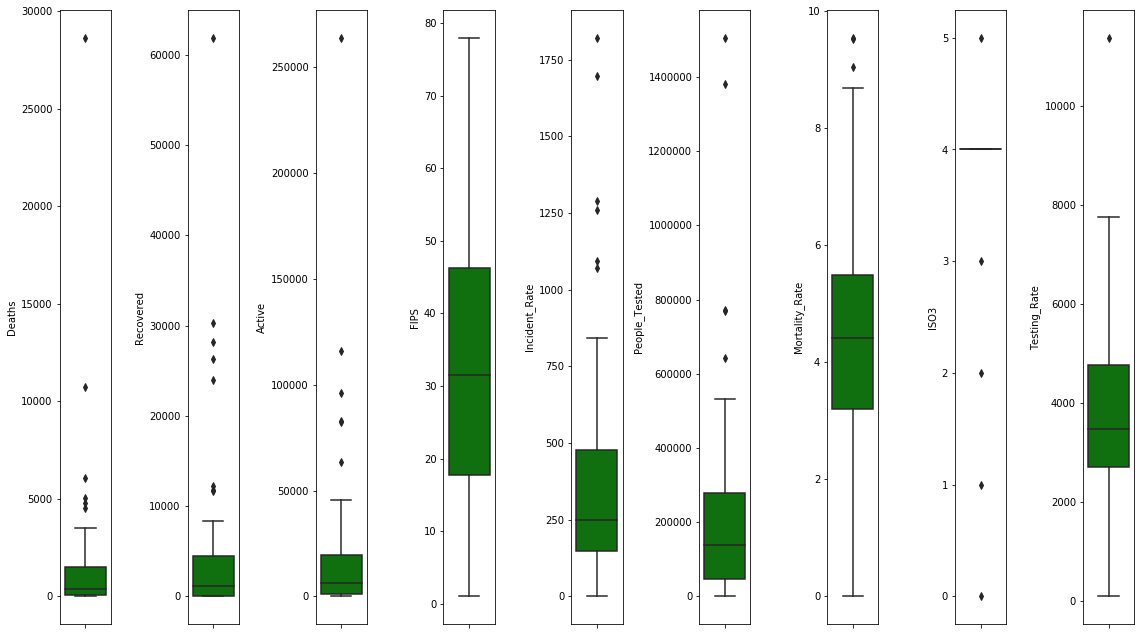

In [92]:
plt.figure(figsize=(17,70))                                      # Outlier is present
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [93]:
df1.skew()

Confirmed         4.646063
Deaths            5.404018
Recovered         3.587378
Active            4.116348
FIPS              0.330221
Incident_Rate     1.955650
People_Tested     2.783163
Mortality_Rate    0.462024
ISO3             -4.045875
Testing_Rate      1.291806
dtype: float64

In [94]:
df1.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000
mean,27708.946429,1668.500000,5255.571429,20784.875000,32.535714,396.230806,2.258534e+05,4.485848,3.839286,3894.186870
std,53258.072431,4146.608003,10534.475856,41859.319213,19.075891,402.682539,2.987834e+05,2.144038,0.733033,1933.169297
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.240000e+02,0.000000,0.000000,97.702058
25%,3567.250000,86.750000,9.750000,1024.750000,17.750000,148.521021,4.608100e+04,3.203221,4.000000,2712.800274
50%,11325.000000,400.000000,1187.500000,6204.500000,31.500000,250.477287,1.386545e+05,4.409323,4.000000,3469.782532
75%,30304.000000,1493.750000,4448.000000,19762.750000,46.250000,477.888542,2.796948e+05,5.487604,4.000000,4763.649736
max,354370.000000,28636.000000,61886.000000,263848.000000,78.000000,1821.620216,1.505836e+06,9.545549,5.000000,11377.424693


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECE9989048>,
      dtype=object)

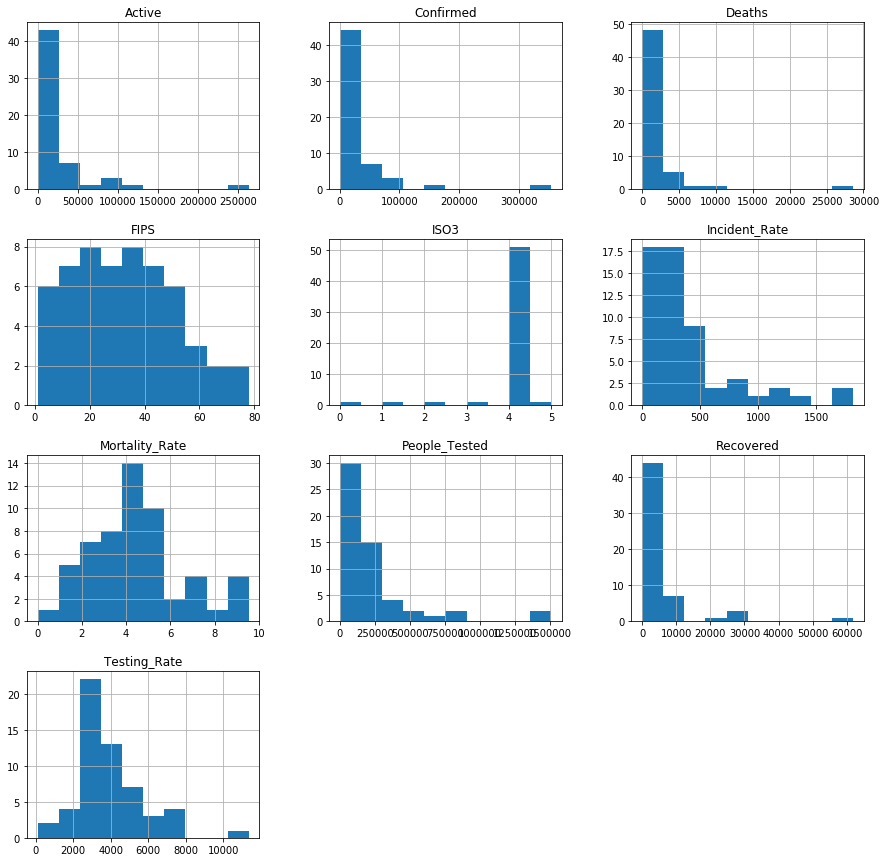

In [95]:
df1.hist(figsize=(15,15))   

# Univariate Analysis

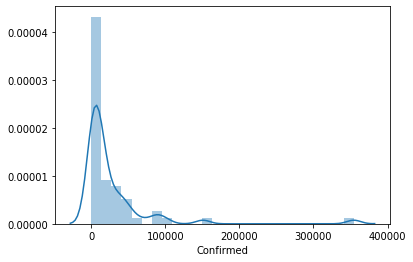

In [136]:
sns.distplot(df1['Confirmed']) 

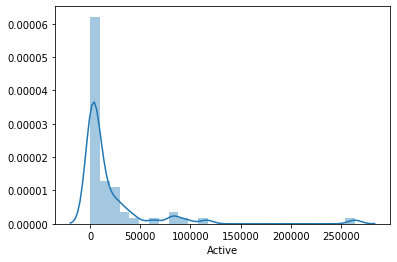

In [137]:
sns.distplot(df1['Active']) 

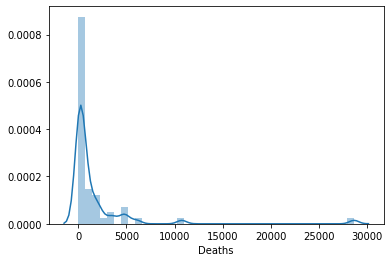

In [138]:
sns.distplot(df1['Deaths']) 

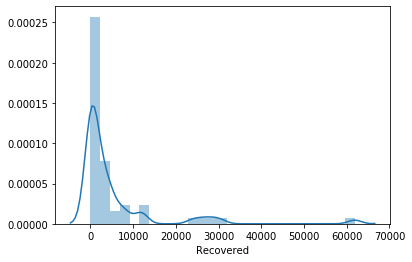

In [139]:
sns.distplot(df1['Recovered']) 

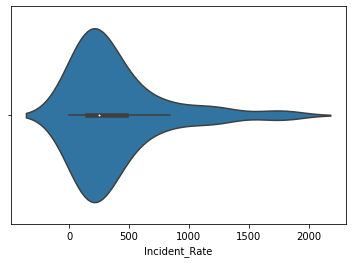

In [141]:
sns.violinplot(df1['Incident_Rate']) 

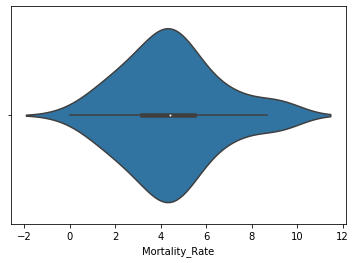

In [142]:
sns.violinplot(df1['Mortality_Rate']) 

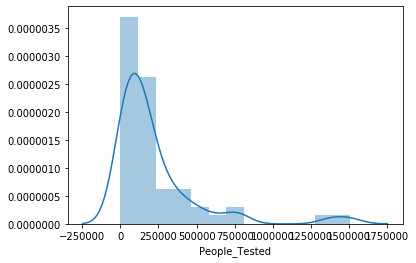

In [144]:
sns.distplot(df1['People_Tested']) 

# Bivariate analysis with respect to 'Deaths' cases

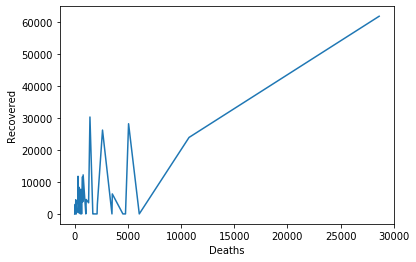

In [145]:
sns.lineplot(x='Deaths', y='Recovered', data=df1) 

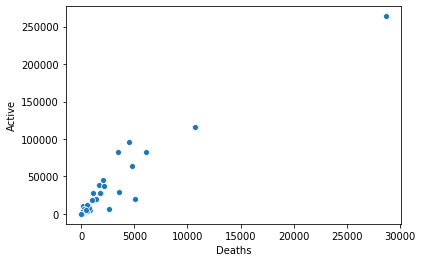

In [147]:
sns.scatterplot(x='Deaths', y='Active', data=df1) 

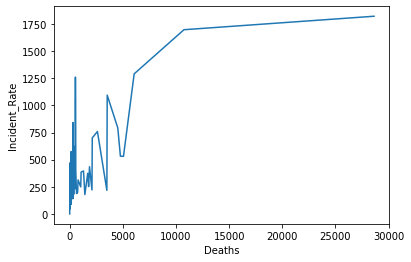

In [148]:
sns.lineplot(x='Deaths', y='Incident_Rate', data=df1) 

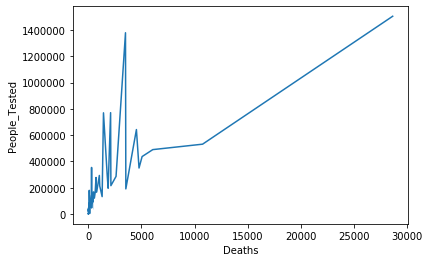

In [149]:
sns.lineplot(x='Deaths', y='People_Tested', data=df1) 

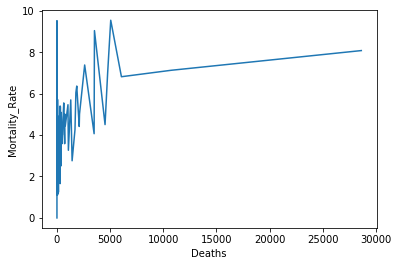

In [151]:
sns.lineplot(x='Deaths', y='Mortality_Rate', data=df1) 

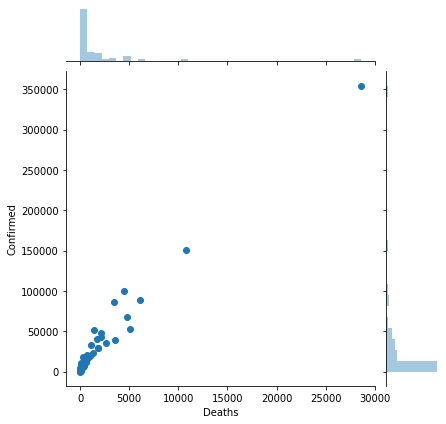

In [153]:
sns.jointplot(x='Deaths', y='Confirmed', data=df1) 

# Bivariate analysis with respect to 'Recovered' cases

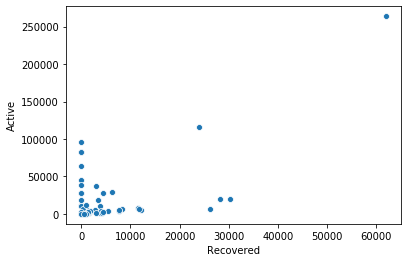

In [154]:
sns.scatterplot(x='Recovered', y='Active', data=df1) 

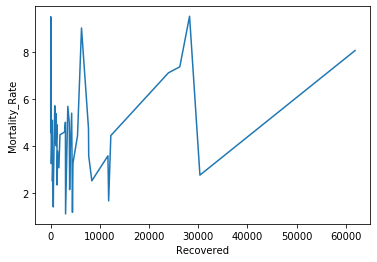

In [155]:
sns.lineplot(x='Recovered', y='Mortality_Rate', data=df1) 

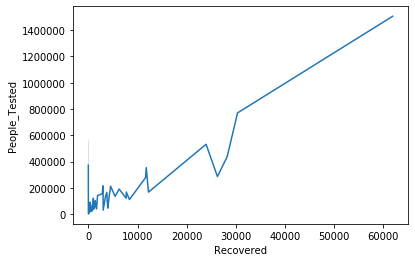

In [156]:
sns.lineplot(x='Recovered', y='People_Tested', data=df1) 

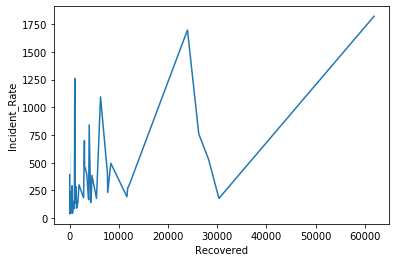

In [157]:
sns.lineplot(x='Recovered', y='Incident_Rate', data=df1) 

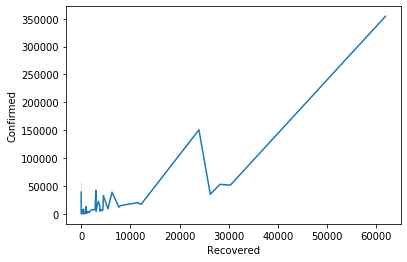

In [158]:
sns.lineplot(x='Recovered', y='Confirmed', data=df1) 

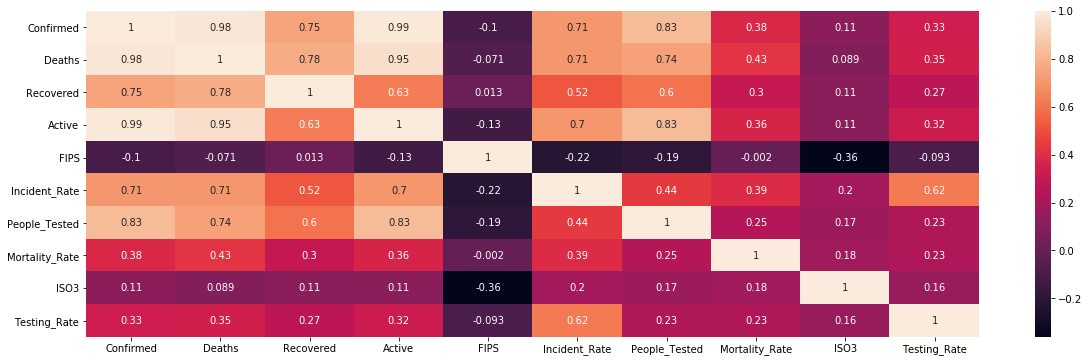

In [96]:
plt.figure(figsize=(20,6))
sns.heatmap(df1.corr(),annot=True) 

# Splitting target as 'Deaths' and rest of the columns as Input variables

In [97]:
df_x=df1.drop('Deaths',axis=1)
df_x.head()

,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,13052,0.0,12530.0,1,266.194321,164450.0,3.999387,4,3353.942386
1,401,352.0,39.0,2,54.815493,37045.0,2.493766,4,5063.940017
2,0,0.0,0.0,60,0.000000,124.0,0.000000,0,222.857246
3,14906,3773.0,10386.0,4,204.788838,165435.0,5.011405,4,2272.859351
4,5003,3852.0,1044.0,5,165.782801,96258.0,2.138717,4,3189.670370


In [98]:
df_y=pd.DataFrame(df1.Deaths)
df_y.head() 

,Deaths
0,522
1,10
2,0
3,747
4,107


In [99]:
print(df_x.shape)
print(df_y.shape) 

(56, 9)
(56, 1)


In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
y = sc.fit_transform(df_y)
y = pd.DataFrame(y,columns=df_y.columns) 

In [101]:
x

,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,-0.277697,-0.503407,-0.198990,-1.668132,-0.325848,-0.207371,-0.228944,0.221230,-0.281990
1,-0.517388,-0.469691,-0.500095,-1.615236,-0.855525,-0.637643,-0.937535,0.221230,0.610572
2,-0.524985,-0.503407,-0.501035,1.452768,-0.992883,-0.762332,-2.111178,-5.284933,-1.916312
3,-0.242570,-0.142009,-0.250673,-1.509443,-0.479719,-0.204045,0.247343,0.221230,-0.846279
4,-0.430196,-0.134442,-0.475868,-1.456546,-0.577461,-0.437669,-1.104632,0.221230,-0.367734
5,1.104350,-0.503407,1.487689,-1.403649,-0.447500,3.898184,-0.197395,0.221230,-0.209462
6,-0.093064,-0.170266,-0.066649,-1.297856,-0.000909,-0.317512,0.570531,0.221230,-0.837677
7,0.214247,0.096593,0.203431,-1.244960,1.749381,-0.118659,2.145571,0.221230,0.759522
8,-0.369738,-0.123618,-0.406564,-1.192063,1.115707,-0.609386,-0.330661,0.221230,0.401583
9,-0.381921,-0.401971,-0.354351,-1.139166,1.688162,-0.626248,0.425528,0.221230,0.956723


In [102]:
x.isna().sum()

Confirmed         0
Recovered         0
Active            0
FIPS              0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
ISO3              0
Testing_Rate      0
dtype: int64

In [103]:
y

,Deaths
0,-0.278993
1,-0.403585
2,-0.406019
3,-0.224241
4,-0.379981
5,0.444954
6,-0.089915
7,0.452741
8,-0.330582
9,-0.306978


In [104]:
y.isna().sum()

Deaths    0
dtype: int64

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

In [106]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42 is 1.0
r2 score corresponding to  43 is 1.0
r2 score corresponding to  44 is 1.0
r2 score corresponding to  45 is 1.0
r2 score corresponding to  46 is 1.0
r2 score corresponding to  47 is 1.0
r2 score corresponding to  48 is 1.0
r2 score corresponding to  49 is 1.0
r2 score corresponding to  50 is 1.0
r2 score corresponding to  51 is 1.0
r2 score corresponding to  52 is 1.0
r2 score corresponding to  53 is 1.0
r2 score corresponding to  54 is 1.0
r2 score corresponding to  55 is 1.0
r2 score corresponding to  56 is 1.0
r2 score corresponding to  57 is 1.0
r2 score corresponding to  58 is 1.0
r2 score corresponding to  59 is 1.0
r2 score corresponding to  60 is 1.0
r2 score corresponding to  61 is 1.0
r2 score corresponding to  62 is 1.0
r2 score corresponding to  63 is 1.0
r2 score corresponding to  64 is 1.0
r2 score corresponding to  65 is 1.0
r2 score corresponding to  66 is 1.0
r2 score corresponding to  67 is 1.0
r2 score corresponding to  68 is 1.0
r

In [109]:
from sklearn.model_selection import cross_val_score 
print('Mean r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Linear Regression:  1.0
Standard Deviation in r2 score for Linear Regression:  0.0


In [107]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  42 is 0.9332755540542099
r2 score corresponding to  43 is 0.9036391987267646
r2 score corresponding to  44 is 0.8929656837802515
r2 score corresponding to  45 is 0.917403883443027
r2 score corresponding to  46 is 0.9128486994684463
r2 score corresponding to  47 is 0.9791777295783792
r2 score corresponding to  48 is 0.9056179199916001
r2 score corresponding to  49 is 0.907791580271306
r2 score corresponding to  50 is 0.9513067391163457
r2 score corresponding to  51 is 0.6728497597456344
r2 score corresponding to  52 is 0.9035669274992958
r2 score corresponding to  53 is 0.9070019405638092
r2 score corresponding to  54 is 0.8133305882283399
r2 score corresponding to  55 is 0.8697261754798269
r2 score corresponding to  56 is 0.9125196731951696
r2 score corresponding to  57 is 0.7819124321064133
r2 score corresponding to  58 is 0.8547598157630146
r2 score corresponding to  59 is 0.9336388195023331
r2 score corresponding to  60 is 0.9281156419240674
r2 score corre

In [108]:
from sklearn.model_selection import cross_val_score 
print('Mean r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for Lasso Regression:  0.20292372742891382
Standard Deviation in r2 score for Lasso Regression:  1.352881627794157


In [110]:
# Here Linear Regression is working best with r2_score of 1.0 (i.e 100%)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test) 

In [111]:
import numpy as np
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))  
print('r2_score is: ',r2_score(y_test,y_pred))

RMSE is:  3.0887354325867102e-15
r2_score is:  1.0


In [118]:
#As Linear Regression is giving 1.0 r2 score so I did not used any other model 
from sklearn.externals import joblib
joblib.dump(lreg, 'linear_reg_US_Covid_deaths.pkl')

['linear_reg_US_Covid_deaths.pkl']

# Splitting target as 'Recovered' and rest of the columns as Input variables

In [119]:
df_x2=df1.drop('Recovered',axis=1)
df_x2.head()

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,13052,522,12530.0,1,266.194321,164450.0,3.999387,4,3353.942386
1,401,10,39.0,2,54.815493,37045.0,2.493766,4,5063.940017
2,0,0,0.0,60,0.000000,124.0,0.000000,0,222.857246
3,14906,747,10386.0,4,204.788838,165435.0,5.011405,4,2272.859351
4,5003,107,1044.0,5,165.782801,96258.0,2.138717,4,3189.670370


In [120]:
df_y2=pd.DataFrame(df1.Recovered)
df_y2.head() 

,Recovered
0,0.0
1,352.0
2,0.0
3,3773.0
4,3852.0


In [121]:
print(df_x2.shape)
print(df_y2.shape)

(56, 9)
(56, 1)


In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2 = sc.fit_transform(df_x2) 
x2 = pd.DataFrame(x2,columns=df_x2.columns) 
y2 = sc.fit_transform(df_y2)
y2 = pd.DataFrame(y2,columns=df_y2.columns)

In [123]:
x2

,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,ISO3,Testing_Rate
0,-0.277697,-0.278993,-0.198990,-1.668132,-0.325848,-0.207371,-0.228944,0.221230,-0.281990
1,-0.517388,-0.403585,-0.500095,-1.615236,-0.855525,-0.637643,-0.937535,0.221230,0.610572
2,-0.524985,-0.406019,-0.501035,1.452768,-0.992883,-0.762332,-2.111178,-5.284933,-1.916312
3,-0.242570,-0.224241,-0.250673,-1.509443,-0.479719,-0.204045,0.247343,0.221230,-0.846279
4,-0.430196,-0.379981,-0.475868,-1.456546,-0.577461,-0.437669,-1.104632,0.221230,-0.367734
5,1.104350,0.444954,1.487689,-1.403649,-0.447500,3.898184,-0.197395,0.221230,-0.209462
6,-0.093064,-0.089915,-0.066649,-1.297856,-0.000909,-0.317512,0.570531,0.221230,-0.837677
7,0.214247,0.452741,0.203431,-1.244960,1.749381,-0.118659,2.145571,0.221230,0.759522
8,-0.369738,-0.330582,-0.406564,-1.192063,1.115707,-0.609386,-0.330661,0.221230,0.401583
9,-0.381921,-0.306978,-0.354351,-1.139166,1.688162,-0.626248,0.425528,0.221230,0.956723


In [124]:
y2

,Recovered
0,-0.503407
1,-0.469691
2,-0.503407
3,-0.142009
4,-0.134442
5,-0.503407
6,-0.170266
7,0.096593
8,-0.123618
9,-0.401971


In [125]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x2,y2):
    max_r_score=0
    for r_state in range(42,100):
        x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,random_state = r_state,test_size=0.20)
        regr.fit(x2_train,y2_train)
        y2_pred = regr.predict(x2_test)
        r2_scr=r2_score(y2_test,y2_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

In [126]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x2,y2)

r2 score corresponding to  42 is 1.0
r2 score corresponding to  43 is 1.0
r2 score corresponding to  44 is 1.0
r2 score corresponding to  45 is 1.0
r2 score corresponding to  46 is 1.0
r2 score corresponding to  47 is 1.0
r2 score corresponding to  48 is 1.0
r2 score corresponding to  49 is 1.0
r2 score corresponding to  50 is 1.0
r2 score corresponding to  51 is 1.0
r2 score corresponding to  52 is 1.0
r2 score corresponding to  53 is 1.0
r2 score corresponding to  54 is 1.0
r2 score corresponding to  55 is 1.0
r2 score corresponding to  56 is 1.0
r2 score corresponding to  57 is 1.0
r2 score corresponding to  58 is 1.0
r2 score corresponding to  59 is 1.0
r2 score corresponding to  60 is 1.0
r2 score corresponding to  61 is 1.0
r2 score corresponding to  62 is 1.0
r2 score corresponding to  63 is 1.0
r2 score corresponding to  64 is 1.0
r2 score corresponding to  65 is 1.0
r2 score corresponding to  66 is 1.0
r2 score corresponding to  67 is 1.0
r2 score corresponding to  68 is 1.0
r

In [127]:
from sklearn.model_selection import cross_val_score 
print('Mean r2 score for Linear Regression: ',cross_val_score(lreg,x2,y2,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Linear Regression:  1.0
Standard Deviation in r2 score for Linear Regression:  0.0


In [128]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x2,y2)

r2 score corresponding to  42 is 0.737381223673534
r2 score corresponding to  43 is 0.5492309206271389
r2 score corresponding to  44 is 0.977996494141159
r2 score corresponding to  45 is 0.9179529768430152
r2 score corresponding to  46 is 0.9802922203528872
r2 score corresponding to  47 is 0.975960038120472
r2 score corresponding to  48 is 0.9387211398522981
r2 score corresponding to  49 is 0.9860857048507358
r2 score corresponding to  50 is 0.9057645060913705
r2 score corresponding to  51 is 0.9507218548416874
r2 score corresponding to  52 is 0.9914144942941717
r2 score corresponding to  53 is 0.995221036662864
r2 score corresponding to  54 is 0.9183270625805579
r2 score corresponding to  55 is 0.891251003540823
r2 score corresponding to  56 is 0.8942252428798547
r2 score corresponding to  57 is 0.958524794402892
r2 score corresponding to  58 is -1.2179463095425338
r2 score corresponding to  59 is 0.8694601388908714
r2 score corresponding to  60 is 0.979090064319345
r2 score correspon

In [129]:
from sklearn.model_selection import cross_val_score 
print('Mean r2 score for Lasso Regression: ',cross_val_score(lsreg,x2,y2,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for Lasso Regression:  0.2883333889395726
Standard Deviation in r2 score for Lasso Regression:  1.352881627794157


In [133]:
# Here Linear Regression is working best with r2_score of 1.0 (i.e 100%)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,random_state = 42, test_size=0.20)
lreg=LinearRegression()
lreg.fit(x2_train,y2_train)
y2_pred=lreg.predict(x2_test) 

In [134]:
import numpy as np
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
print('RMSE is: ',np.sqrt(mean_squared_error(y2_test,y2_pred)))  
print('r2_score is: ',r2_score(y2_test,y2_pred))

RMSE is:  1.9311620319713327e-15
r2_score is:  1.0


In [135]:
#As Linear Regression is giving 1.0 r2 score so I did not used any other model 
from sklearn.externals import joblib
joblib.dump(lreg, 'linear_reg_US_Covid_recovered.pkl') 

['linear_reg_US_Covid_recovered.pkl']